# Dogs vs Cats -- Image Classification 

In [7]:
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plot
%matplotlib inline

import os
import random
import gc



In [22]:
train_dir = 'train'
test_dir = 'test1'

In [37]:
train_dogs = ['train/{}'.format(i) for i in os.listdir(train_dir) if 'dog' in i] #gets dog images
train_cats = ['train/{}'.format(i) for i in os.listdir(train_dir) if 'cat' in i]

test_imgs = ['test1/{}'.format(i) for i in os.listdir(test_dir)] #gets test images

train_imgs = train_dogs[:2000] + train_cats[:2000] # slice the dataset and use 2000 in each class
random.shuffle(train_imgs) # shuffle it randomly



Populating the interactive namespace from numpy and matplotlib


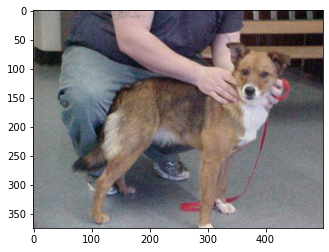

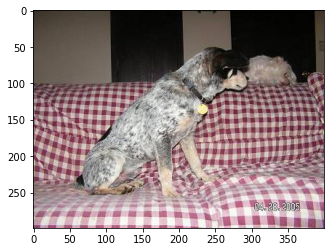

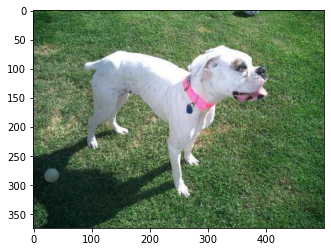

In [39]:
import matplotlib.image as mpimg
%pylab inline
for ima in train_imgs[0:3]:
    img=mpimg.imread(ima)
    imgplot = plt.imshow(img)
    plt.show()

In [40]:
#Lets declare our image dimensions
#we are using colour images

nrows = 150
ncolumns = 150
channels = 3 #change to 1 if you want to use grayscale

In [46]:
# A function to read and process images to an acceptable format for our model

def read_and_process_image(list_of_images):
    
#    Returns two arrays:
#         X is an array of resized images
#         y is an array of labels

    X = [] # images
    y = [] #labels
    
    for image in list_of_images:
        X.append(cv2.resize(cv2.imread(image, cv2.IMREAD_COLOR), (nrows,ncolumns), interpolation=cv2.INTER_CUBIC)) #Read the image
        #get the table
        
        if 'dog' in image:
            y.append(1)
        elif 'cat' in image:
            y.append(0)
    
    return X, y







In [47]:
X,y = read_and_process_image(train_imgs)

In [48]:
X[0]

array([[[127, 133, 138],
        [105, 114, 118],
        [111, 122, 126],
        ...,
        [ 12,  16,  20],
        [ 12,  18,  13],
        [ 12,   7,   1]],

       [[123, 130, 134],
        [117, 127, 130],
        [116, 128, 131],
        ...,
        [ 14,  11,  20],
        [  8,   8,   9],
        [ 16,   8,  17]],

       [[121, 128, 132],
        [120, 130, 133],
        [113, 126, 128],
        ...,
        [ 16,   8,  19],
        [ 22,  16,  22],
        [  7,   4,  17]],

       ...,

       [[129, 124, 119],
        [129, 124, 122],
        [144, 138, 138],
        ...,
        [156, 150, 151],
        [153, 147, 148],
        [161, 152, 153]],

       [[125, 121, 116],
        [127, 122, 119],
        [134, 129, 128],
        ...,
        [156, 150, 151],
        [156, 150, 151],
        [159, 151, 152]],

       [[128, 124, 119],
        [128, 123, 120],
        [140, 135, 134],
        ...,
        [153, 147, 148],
        [154, 148, 149],
        [153, 145, 146]]

In [49]:
y

[1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,


/Users/danielcecchin/opt/anaconda3/envs/kaggle/lib/python3.7/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  after removing the cwd from sys.path.


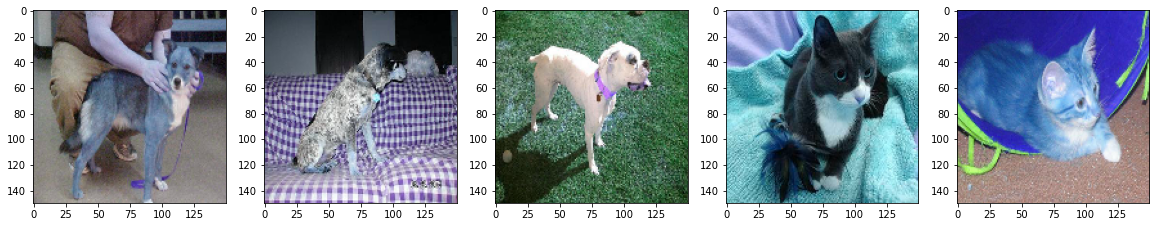

In [52]:
plt.figure(figsize=(20,10))
columns = 5
for i in range(columns):
    plt.subplot(5 / columns + 1, columns, i + 1)
    plt.imshow(X[i])

/Users/danielcecchin/opt/anaconda3/envs/kaggle/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Labels for Cats and Dogs')

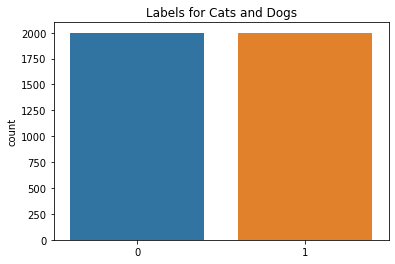

In [54]:
import seaborn as sns

#covert list to numpy array

X = np.array(X)
y = np.array(y)

#Lets plot the label to be sure we just have two classes

sns.countplot(y)
plt.title("Labels for Cats and Dogs")

In [55]:
print("Shape of train iamges is: ",X.shape)
print("Shape of labels is: ", y.shape)

Shape of train iamges is:  (4000, 150, 150, 3)
Shape of labels is:  (4000,)


In [56]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=2)

print("Shape of train iamges is: ", X_train.shape)
print("Shape of validation images is: ", X_test.shape)
print("Shape of labels is: ", y_train.shape)
print("Shape of labels is: ", y_test.shape)

Shape of train iamges is:  (3200, 150, 150, 3)
Shape of validation images is:  (800, 150, 150, 3)
Shape of labels is:  (3200,)
Shape of labels is:  (800,)


In [69]:
ntrain = len(X_train)
ntest = len(X_test)

batch_size = 32

In [58]:
from keras import layers
from keras import models
from keras import optimizers
from keras_preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import img_to_array_to_array, load_img

In [62]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Flatten())
model.add(layers.Dropout(0.5)) #Dropout for regulations
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid')) #Sigmiod function at the end because we have just two classes


In [63]:
#Lets see our model
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 15, 15, 128)      

In [64]:
#We'll use the RMSprop optimizer with a learning rate of 0.0001
#Wel'll use binary_crossentropy loss because its a binary classification
model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

In [67]:
#Lets create the augmentions configuration 
#This helps prevent overfitting, since we are using a small dataset
train_datagen = ImageDataGenerator(rescale=1./255, #Scale the iamge between 0 and 1
                                  rotation_range = 40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)           
                                  
                                  

test_datagen = ImageDataGenerator(rescale=1./255) #We do not augment validation data. We only perform rescale

In [71]:
train_generator = train_datagen.flow(X_train, y_train, batch_size=batch_size)
test_generator = test_datagen.flow(X_test, y_test, batch_size=batch_size)

In [72]:
#The training part
#We train for 64 epochs with about 100 steps per epoch
history = model.fit_generator(train_generator,
                             steps_per_epoch=ntrain // batch_size,
                             epochs=64,
                             validation_data=test_generator,
                             validation_steps=ntest // batch_size)

Epoch 1/64
100/100 [==============================] - 49s 487ms/step - loss: 0.6952 - acc: 0.5113 - val_loss: 0.6954 - val_acc: 0.5825
Epoch 2/64
100/100 [==============================] - 49s 486ms/step - loss: 0.6902 - acc: 0.5169 - val_loss: 0.6781 - val_acc: 0.5350
Epoch 3/64
100/100 [==============================] - 48s 481ms/step - loss: 0.6802 - acc: 0.5741 - val_loss: 0.6263 - val_acc: 0.5625
Epoch 4/64
100/100 [==============================] - 48s 480ms/step - loss: 0.6639 - acc: 0.6012 - val_loss: 0.6022 - val_acc: 0.5888
Epoch 5/64
100/100 [==============================] - 48s 480ms/step - loss: 0.6516 - acc: 0.6241 - val_loss: 0.6366 - val_acc: 0.6750
Epoch 6/64
100/100 [==============================] - 48s 483ms/step - loss: 0.6422 - acc: 0.6231 - val_loss: 0.6589 - val_acc: 0.6662
Epoch 7/64
100/100 [==============================] - 49s 485ms/step - loss: 0.6277 - acc: 0.6428 - val_loss: 0.5375 - val_acc: 0.6275
Epoch 8/64
100/100 [==============================] - 4

100/100 [==============================] - 49s 489ms/step - loss: 0.4679 - acc: 0.7800 - val_loss: 0.3808 - val_acc: 0.8388
Epoch 62/64
100/100 [==============================] - 49s 489ms/step - loss: 0.4587 - acc: 0.7919 - val_loss: 0.3480 - val_acc: 0.8425
Epoch 63/64
100/100 [==============================] - 49s 489ms/step - loss: 0.4471 - acc: 0.7887 - val_loss: 0.4480 - val_acc: 0.8100
Epoch 64/64
100/100 [==============================] - 49s 490ms/step - loss: 0.4519 - acc: 0.7881 - val_loss: 0.3943 - val_acc: 0.8125


In [73]:
# Save the model
model.save_weights('model_weights.h5')
model.save('model_keras.h5')


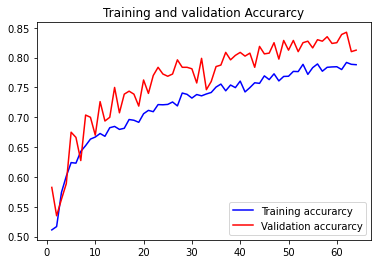

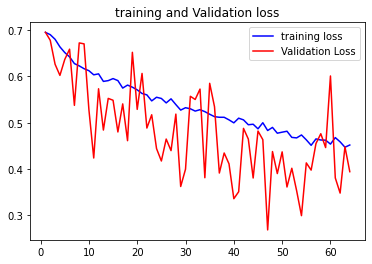

In [79]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.title('Training and validation Accurarcy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'b', label="training loss")
plt.plot(epochs, val_loss, 'r', label="Validation Loss")
plt.title("training and Validation loss")
plt.legend()

plt.show()

In [80]:
X_test2, y_test2 = read_and_process_image(test_imgs[0:10]) #Y_test in this case will be empty
x = np.array(X_test2)

test_datagen = ImageDataGenerator(rescale=1./255)

/Users/danielcecchin/opt/anaconda3/envs/kaggle/lib/python3.7/site-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  # This is added back by InteractiveShellApp.init_path()


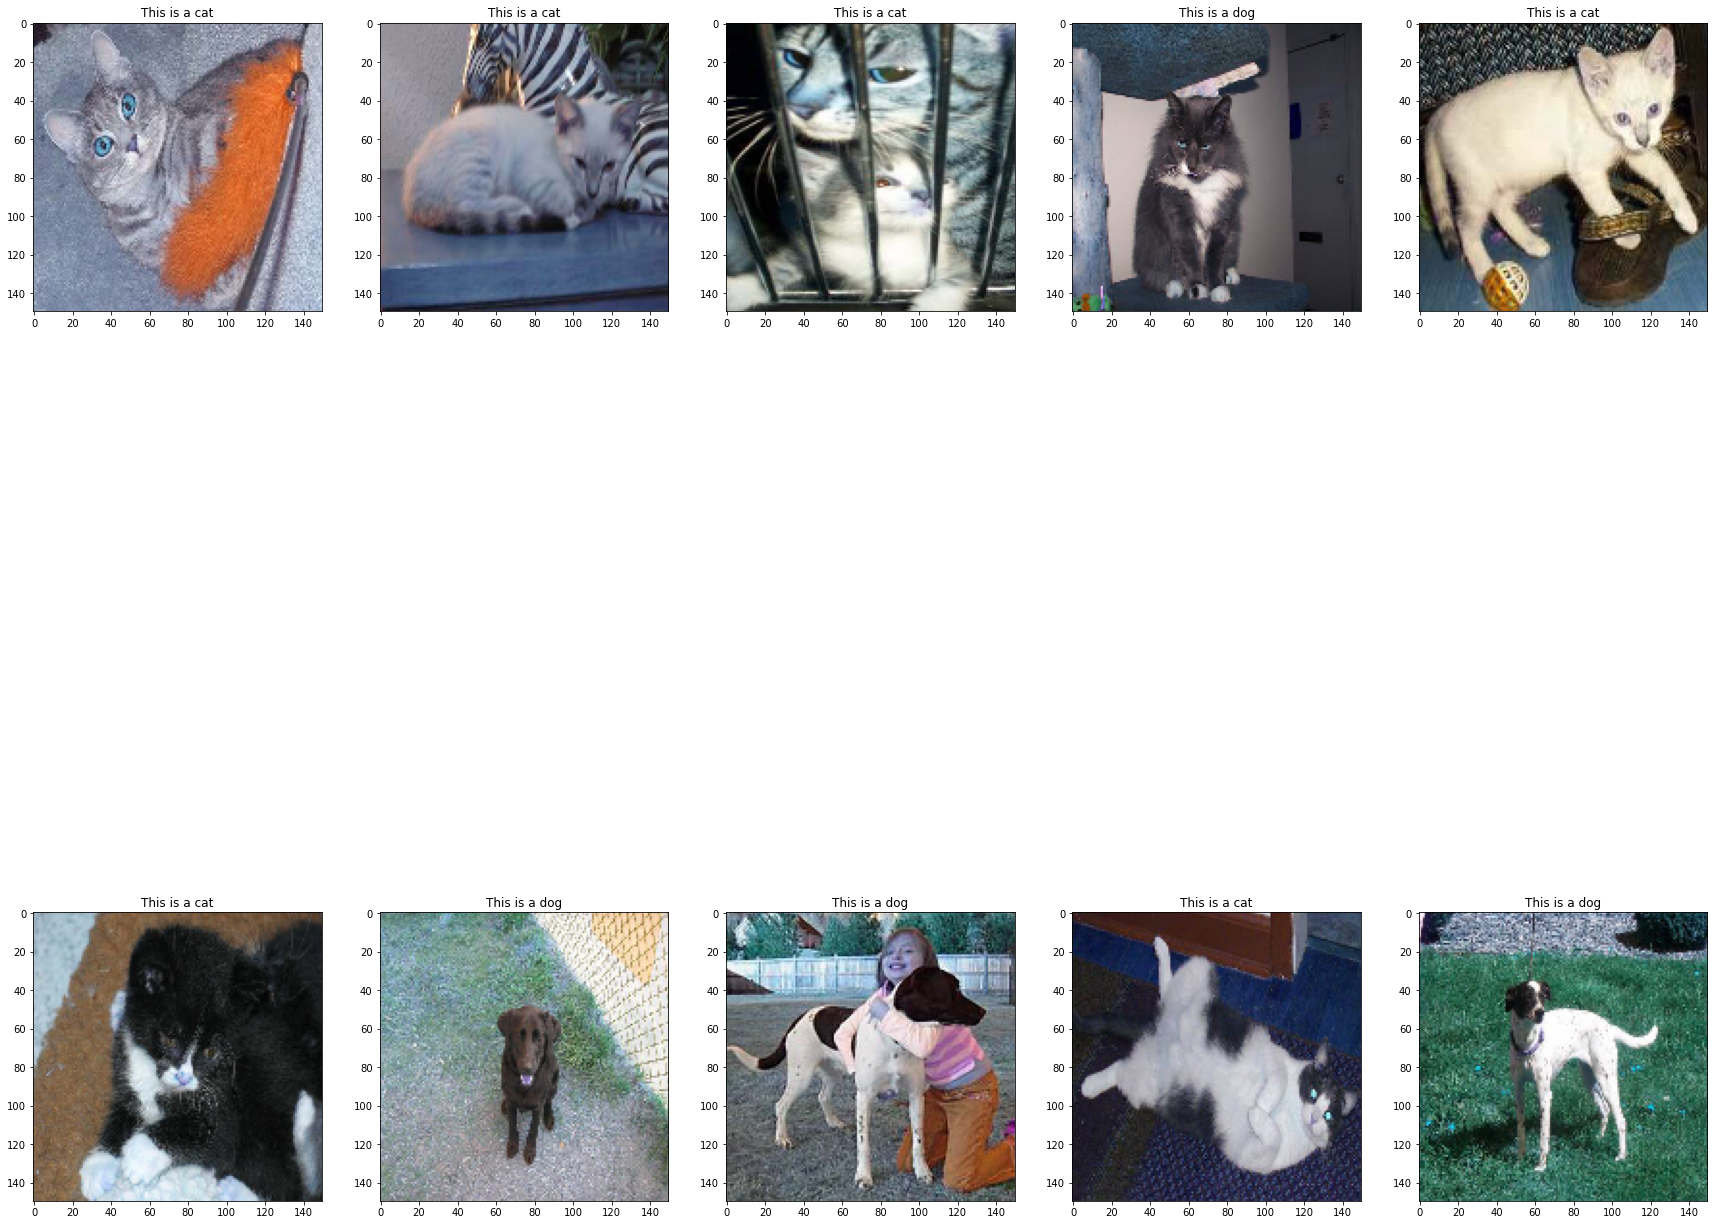

In [83]:
i = 0
text_labels = []
plt.figure(figsize=(30,30))
for batch in test_datagen.flow(x, batch_size=1):
    pred = model.predict(batch)
    if pred > 0.5:
        text_labels.append('dog')
    else:
        text_labels.append('cat')
        
    plt.subplot(5 / columns + 1, columns, i+ 1)
    plt.title("This is a " + text_labels[i])
    imgplot = plt.imshow(batch[0])
    
    i += 1
    if i % 10 == 0:
        break
plt.show()

# Transfer Learning

In [84]:
from keras.applications import InceptionResNetV2

In [85]:
conv_base = InceptionResNetV2(weights='imagenet', include_top=False, input_shape=(150,150,3))

219062272/219055592 [==============================] - 13s 0us/step


In [86]:
conv_base.summary()

Model: "inception_resnet_v2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 150, 150, 3)  0                                            
__________________________________________________________________________________________________
conv2d_14 (Conv2D)              (None, 74, 74, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 74, 74, 32)   96          conv2d_14[0][0]                  
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 74, 74, 32)   0           batch_normalization_1[0][0]      
________________________________________________________________________________

In [89]:
model2 = models.Sequential()
model2.add(conv_base)
model2.add(layers.Flatten())
model2.add(layers.Dense(256, activation='relu'))
model2.add(layers.Dense(1, activation='sigmoid'))

In [90]:
print("number of trainable weights before freezing the conv_base:", len(model2.trainable_weights))
conv_base.trainable=False
print("number of trainable weights after freezing the conv_base: ", len(model2.trainable_weights))

number of trainable weights before freezing the conv_base: 4
number of trainable weights after freezing the conv_base:  4


In [93]:
model2.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=2e-5), metrics=['acc'])

In [94]:
history2 = model2.fit_generator(train_generator,
                               steps_per_epoch=ntrain // batch_size,
                               epochs=20,
                               validation_data=test_generator,
                               validation_steps=ntest // batch_size)

Epoch 1/20
100/100 [==============================] - 386s 4s/step - loss: 0.5362 - acc: 0.7188 - val_loss: 0.0020 - val_acc: 0.9388
Epoch 2/20
100/100 [==============================] - 351s 4s/step - loss: 0.4401 - acc: 0.7856 - val_loss: 0.4086 - val_acc: 0.9325
Epoch 3/20
100/100 [==============================] - 345s 3s/step - loss: 0.4055 - acc: 0.8222 - val_loss: 0.0050 - val_acc: 0.9425
Epoch 4/20
100/100 [==============================] - 413s 4s/step - loss: 0.3812 - acc: 0.8206 - val_loss: 0.1365 - val_acc: 0.9400
Epoch 5/20
100/100 [==============================] - 343s 3s/step - loss: 0.3725 - acc: 0.8256 - val_loss: 0.7616 - val_acc: 0.9475
Epoch 6/20
100/100 [==============================] - 344s 3s/step - loss: 0.3686 - acc: 0.8375 - val_loss: 0.0333 - val_acc: 0.9500
Epoch 7/20
100/100 [==============================] - 376s 4s/step - loss: 0.3658 - acc: 0.8381 - val_loss: 0.0921 - val_acc: 0.9488
Epoch 8/20
100/100 [==============================] - 423s 4s/step - 

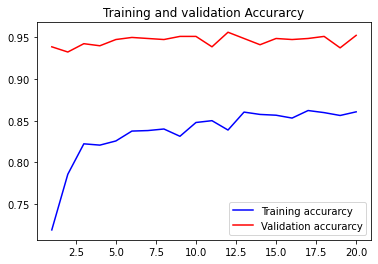

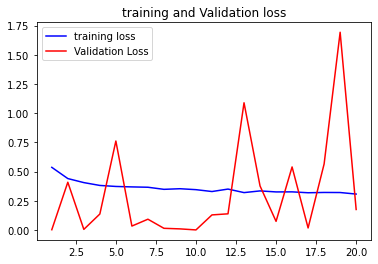

In [95]:
acc = history2.history['acc']
val_acc = history2.history['val_acc']
loss = history2.history['loss']
val_loss = history2.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'b', label='Training accurarcy')
plt.plot(epochs, val_acc, 'r', label='Validation accurarcy')
plt.title('Training and validation Accurarcy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'b', label="training loss")
plt.plot(epochs, val_loss, 'r', label="Validation Loss")
plt.title("training and Validation loss")
plt.legend()

plt.show()